# Flight price prediction

### Dataset description:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

Features:

1. Airline: The name of the airline.

2. Date_of_Journey: The date of the journey

3. Source: The source from which the service begins.

4. Destination: The destination where the service ends.

5. Route: The route taken by the flight to reach the destination.

6. Dep_Time: The time when the journey starts from the source.

7. Arrival_Time: Time of arrival at the destination.

8. Duration: Total duration of the flight.

9. Total_Stops: Total stops between the source and destination.

10. Additional_Info: Additional information about the flight

11. Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

In [173]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
# Load the dataset

df_train=pd.read_excel("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/Flight/Flight.xlsx")
df_test=pd.read_excel("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/Flight/Test_set.xlsx")


In [175]:
# concat both training & test set

df=df_train.append(df_test)

In [176]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


### EDA

In [177]:
# checking the shape of the train dataset

df_train.shape

(10683, 11)

In [178]:
# checking the shape of the test dataset

df_test.shape

(2671, 10)

In [179]:
# checking the shape of the concatinated dataset

df.shape

(13354, 11)

In [180]:
# grouping the categorical variables 

cat_cols = [x for x in df.columns if df[x].dtypes == 'O']
df[cat_cols]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [181]:
# checking the value_counts

df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [182]:
# checking the value_counts of the Route

df.Route.value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [183]:
# checking the null values in the dataset

df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [184]:
# checking for any duplicates 

df.Route.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2666     True
2667     True
2668     True
2669     True
2670     True
Name: Route, Length: 13354, dtype: bool

###### Key Insights:
1. There are Duplicate values in the feature Route
2. There are NAN values in the column Price which will be treated with the mean of the price
3. There are NAN values in the column Route,Total steps. we tried to delete that value but its not getting deleted so we will keep it as it is
4. Totally there are 10 features of the category type
5. df is of the shape (13354, 11) after merging both train & test dataset

##### Data Preprocessing

In [185]:
# dropping the duplicates

df1=df.drop_duplicates()

In [186]:
# Rows displayed after dropping duplicates
print("Length of original dataset",len(df))

print("Length of dataset after removing duplicates",len(df1))

print("Duplicate rows length removed from the dataset", len(df)-len(df1))

Length of original dataset 13354
Length of dataset after removing duplicates 13108
Duplicate rows length removed from the dataset 246


In [187]:
# replace null values with the mean of the feature dataset

df['Price']=df['Price'].fillna(df['Price'].mean())

In [188]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [189]:
df.dropna(inplace=True)

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

In [190]:
def change_into_datetime(cols):
    df[cols]=pd.to_datetime(df[cols])

In [191]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [192]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [193]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [194]:
# function for extracting hour and minutes
def extract_hour(data,cols):
    data[cols+'_hour']=data[cols].dt.hour
    
def extract_min(data,cols):
    data[cols+'_min']=data[cols].dt.minute
    

def drop_col(data,cols):
    data.drop(cols,axis=1,inplace=True)

In [195]:
extract_hour(df,'Dep_Time')

extract_min(df,'Dep_Time')

drop_col(df,'Dep_Time')

In [196]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [197]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,3,1,16,50,21,35


In [198]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                 # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m'        # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [199]:
df['Duration']=duration

In [200]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

df['duration_hour']=df['Duration'].apply(hour)
df['duration_min']=df['Duration'].apply(minutes)

In [201]:
drop_col(df,'Duration')

In [202]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                float64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
duration_hour         object
duration_min          object
dtype: object

In [203]:
df['duration_hour']= df['duration_hour'].astype(int)
df['duration_min']= df['duration_min'].astype(int)

In [204]:
# Finding the categorical features
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
df[cat_vars]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info


In [205]:
# Finding the numerical features
num_vars = [var for var in df.columns if df[var].dtypes!='O']
df[num_vars]

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min
0,3897.000000,24,3,22,20,1,10,2,50
1,7662.000000,5,1,5,50,13,15,7,25
2,13882.000000,6,9,9,25,4,25,19,0
3,6218.000000,5,12,18,5,23,30,5,25
4,13302.000000,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
2666,9087.064121,6,6,20,30,20,25,23,55
2667,9087.064121,27,3,14,20,16,55,2,35
2668,9087.064121,3,6,21,50,4,25,6,35
2669,9087.064121,3,6,4,0,19,15,15,15


In [206]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [207]:
df.drop('Additional_Info',axis=1,inplace=True)

##### Visualizations

No handles with labels found to put in legend.


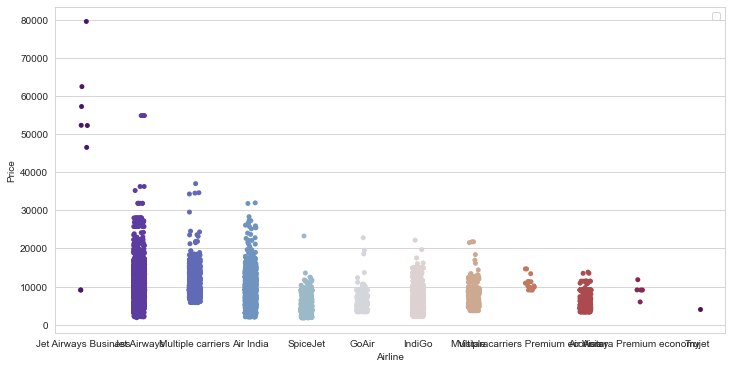

In [208]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.stripplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),palette='twilight_shifted')
plt.legend()

According to the plot we plotted,
1. Jet Airways Business is having high price
2. Trujet is having very low price
3. Jet Airways Economical &  Air India has moderate prices ranging from 500-30k 

<AxesSubplot:xlabel='Airline', ylabel='Price'>

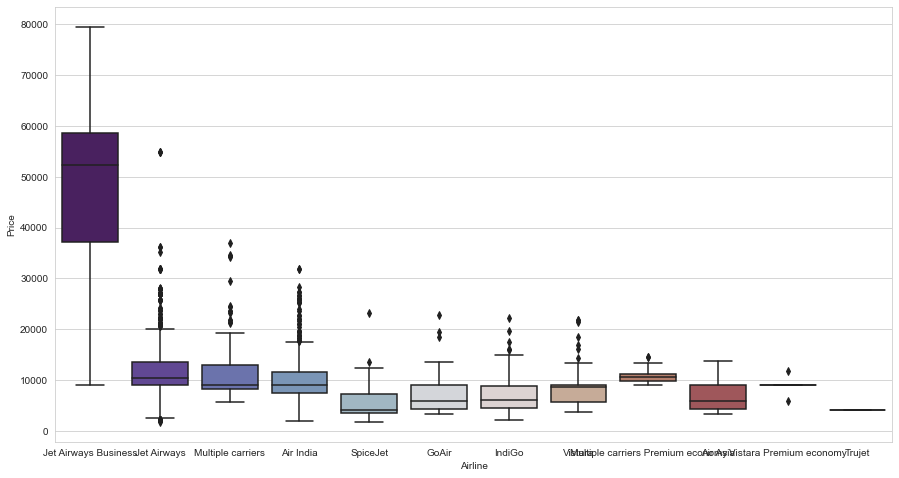

In [209]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),palette='twilight_shifted')

There are more number of outliers in Jet Airways,Multiple carriers,AirIndia,Indigo,Vistara. So we will treat in later stages to remove them before modelling

<Figure size 1080x576 with 0 Axes>

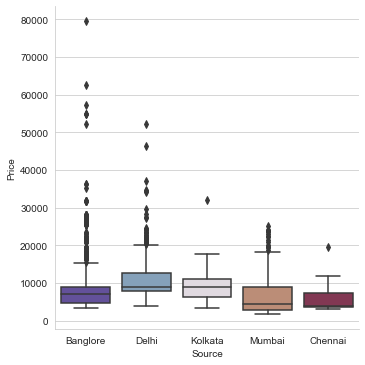

In [210]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='box',palette='twilight_shifted')

from the above boxplot its clear that Bangalore,Delhi & Mumbai are having outliers

<Figure size 1080x576 with 0 Axes>

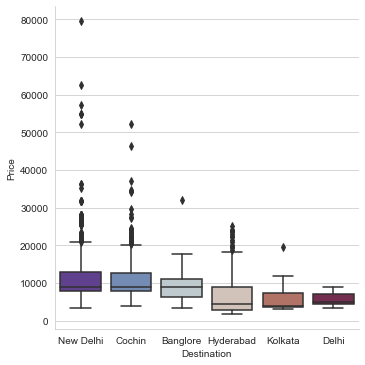

In [211]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='box',palette='twilight_shifted')

from above boxplot, NewDelhi & Cochin are having high number of Outliers.

<Figure size 1080x576 with 0 Axes>

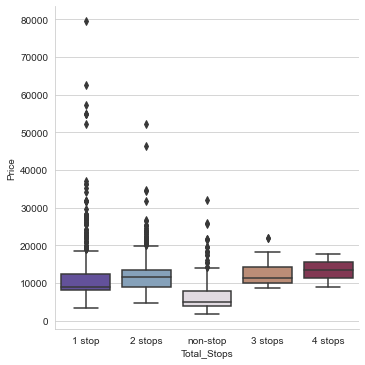

In [212]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False),kind='box',palette='twilight_shifted')

1 stop,2 stops & non-stop are having high number of outliers.We will remove the outliers in the later steps

In [213]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [214]:
df.drop('Route',axis=1,inplace=True)

In [215]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,7662.0,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [216]:
cat_vars.remove('Additional_Info')
cat_vars.remove('Route')`

SyntaxError: invalid syntax (<ipython-input-216-a56f5f7ad929>, line 2)

#### Label-encoding

In [217]:
#encoding of Airline column
Airline=pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [218]:
#encoding of source column
source=pd.get_dummies(df['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [219]:
#encoding of destination column
destination=pd.get_dummies(df['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [220]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)

In [221]:
drop_col(df,'Source')
drop_col(df,'Destination')
drop_col(df,'Airline')

In [222]:
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [223]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Route1,Route2,Route3,Route4,Route5
0,0,3897.0,24,3,22,20,1,10,2,50,BLR,DEL,None,None,None
1,2,7662.0,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,2,13882.0,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,1,6218.0,5,12,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,1,13302.0,3,1,16,50,21,35,4,45,BLR,NAG,DEL,None,None


In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=le.fit_transform(df[i])

In [225]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Route1,Route2,Route3,Route4,Route5
0,0,3897.0,24,3,22,20,1,10,2,50,0,13,30,13,5
1,2,7662.0,5,1,5,50,13,15,7,25,2,25,1,3,5
2,2,13882.0,6,9,9,25,4,25,19,0,3,32,4,5,5
3,1,6218.0,5,12,18,5,23,30,5,25,2,34,3,13,5
4,1,13302.0,3,1,16,50,21,35,4,45,0,34,8,13,5


In [226]:
final_df=pd.concat([df,Airline,source,destination],axis=1)
final_df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

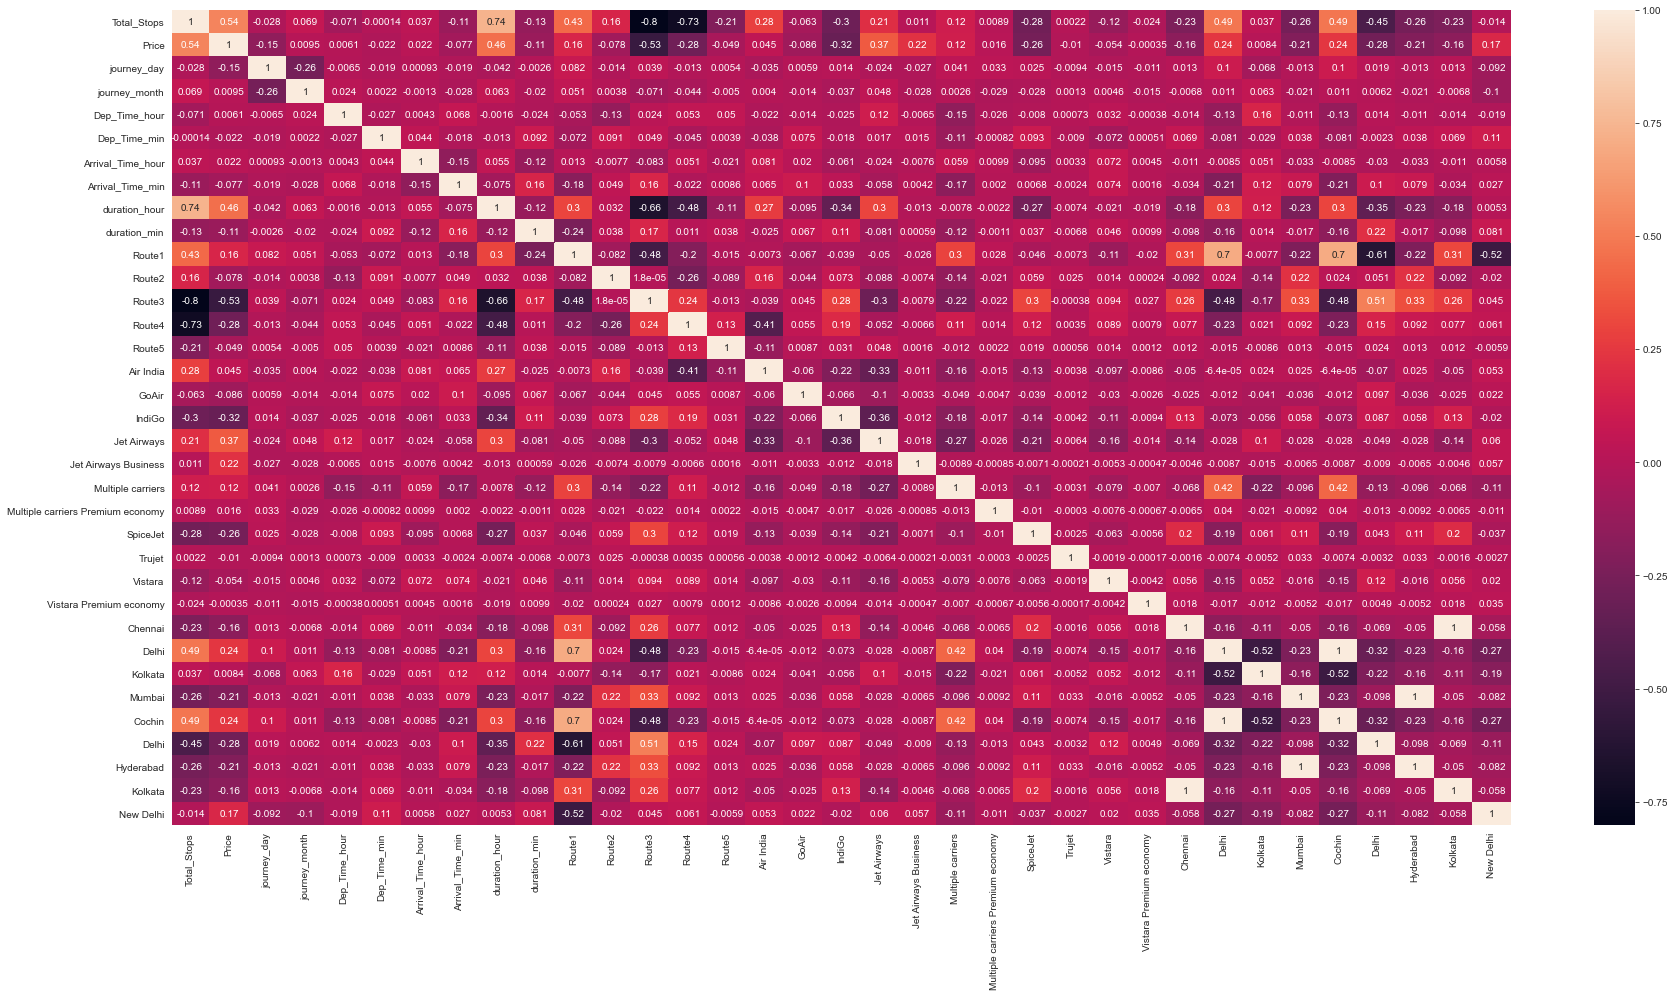

In [227]:
df_corr = final_df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df_corr,annot=True)

we are having negetive co relation between input features and its not related to target feature. so if we remove that it make no sense so we will keep it the way it ease

In [228]:
# deleting outliers
Q1 = final_df[num_vars].quantile(0.25)
Q3 = final_df[num_vars].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_new = final_df[~((final_df[num_vars] < (Q1 - 1.5 * IQR)) |(final_df[num_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_new.shape)

Here we will get IQR for each column
 Price                4952.0
journey_day            16.0
journey_month           3.0
Dep_Time_hour          10.0
Dep_Time_min           35.0
Arrival_Time_hour      11.0
Arrival_Time_min       25.0
duration_hour          13.0
duration_min           30.0
dtype: float64


(11856, 35)

In [231]:
x= df_new.drop("Price",axis=1)
x_cols=x.columns
y=df_new['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
4    13302.0
5     3873.0
Name: Price, dtype: float64

In [232]:
# Removing skewness

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### Data Modelling

In [233]:
# importing required libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error


In [234]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [235]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of interquartile is one of the parameters
robust_stan_train = robust.fit_transform(x_train)
robust_stan_test = robust.fit_transform(x_test)
robust_stan_normalize_train= normalize.fit_transform(robust_stan_train)
robust_stan_normalize_test = normalize.fit_transform(robust_stan_test)

# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)

df_robust_normalize_train = pd.DataFrame(robust_stan_normalize_train,columns=x_cols)
df_robust_normalize_test = pd.DataFrame(robust_stan_normalize_test,columns=x_cols)
df_robust_normalize_train.head()

,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Route1,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.351236,0.252425,1.000000,0.491187,0.000000,0.170630,0.577735,0.824780,0.533381,0.684896,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.351236,0.675455,0.291879,0.448072,0.000000,0.561316,0.400571,0.471357,0.352492,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.675455,0.291879,0.901379,1.000000,1.000000,0.936649,0.281621,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.931591,0.422721,0.491187,0.891849,0.517658,0.731710,0.281621,0.927356,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.608376,0.180318,0.000000,0.403419,0.000000,0.213719,0.577735,0.867868,0.533381,0.408588,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


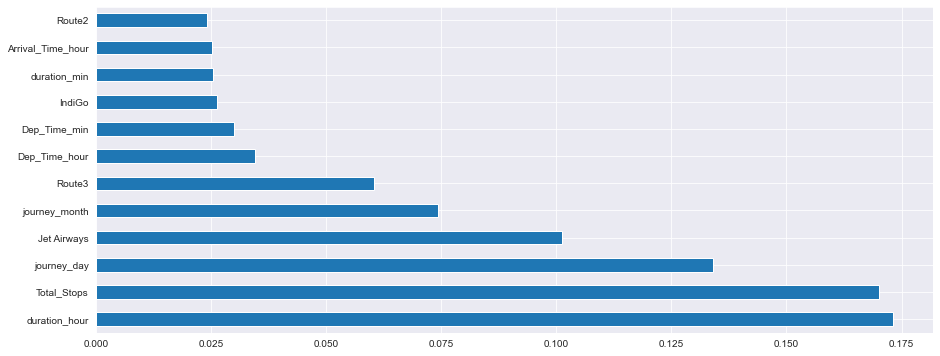

In [236]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

# we will plot the feature importance of the Extra TreesClassifier
feat_importances = pd.Series(model.feature_importances_, index=x_cols)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [237]:
print(model.feature_importances_)

[1.70171096e-01 1.34125850e-01 7.43166855e-02 3.45274253e-02
 2.99487968e-02 2.51100226e-02 2.35849269e-02 1.73166814e-01
 2.55087305e-02 3.73592598e-03 2.41079168e-02 6.04885698e-02
 2.36018554e-02 3.51149072e-04 6.79835201e-03 1.85390772e-03
 2.63391677e-02 1.01157695e-01 3.18824590e-05 2.00339125e-02
 8.36368912e-04 2.28611154e-03 1.04382814e-04 5.54387804e-03
 1.62851350e-04 1.00696498e-03 2.05449286e-03 4.99789714e-03
 2.42890573e-03 4.31274591e-03 2.78400262e-03 1.69492064e-03
 1.08031766e-03 1.17454778e-02]


In [277]:
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),('etr',ExtraTreesRegressor()),
         ('xgb',XGBRegressor()),('dtr',DecisionTreeRegressor()),('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet())]

In [278]:
#function for selection of model based on cross validation scores
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [279]:
#cross val scores for training set
basic_model_selection(robust_stan_normalize_train,y_train,10,models)

lr -4.2657639350906925e+17
ridge 0.5195654627654231
lasso 0.5193734780743514
rfr 0.579530795070918
etr 0.4819771998650041
xgb 0.6179556501954296
dtr 0.3448858700407184
br 0.5570075298318736
gbr 0.6213173947245678
en 0.3308494176776586


As we are getting comparitively high CV score for RFR. we will consider the same for our model building and ignore the rest of the models

In [241]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(robust_stan_normalize_train,y_train)
y_pred=model.predict(robust_stan_normalize_test)
model.score(robust_stan_normalize_test,y_test)

0.5677803770296789

In [242]:
model.score(robust_stan_normalize_train,y_train)

0.8970070626456705

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


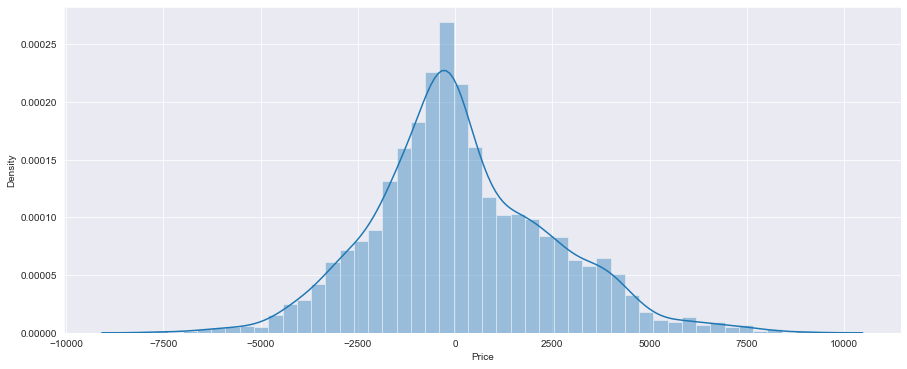

In [243]:
sns.distplot(y_test-y_pred)
plt.show()

In [244]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1756.402119648195
MSE: 5348697.1506936345
RMSE: 2312.7250486587536


In [245]:
metrics.r2_score(y_test, y_pred)

0.5677803770296789

##### Using K-nearest neighbor Regressor

In [246]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(robust_stan_normalize_train,y_train)
y_pred_knn=knn.predict(robust_stan_normalize_test)
knn.score(robust_stan_normalize_test,y_test)

0.5802407553263689

In [247]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,150,200]
max_features = ['auto', 'sqrt']
max_depth = [2,3,5]
min_samples_split = [2, 5, 3]
min_samples_leaf = [5]

In [248]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [249]:
grid = GridSearchCV(RandomForestRegressor(), param_grid= random_grid,scoring='neg_mean_squared_error',cv = 5, verbose=2, n_jobs = 1)

In [250]:
grid.fit(robust_stan_normalize_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5],
                         'min_samples_split': [2, 5, 3],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [251]:
grid.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 100}

In [252]:
print(r2_score(y_pred_knn,y_test))

0.38409126087238266


In [253]:
prediction = grid.predict(x_test)

##### Using XGBRegressor


In [261]:
parameters_xgb = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
                 }

In [262]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        n_jobs=-1,
                        cv = cross_folds,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

In [263]:
#tuning for XGBRegressor
model_parameter_tuning(x_train,y_train,XGBRegressor(),parameters_xgb,3)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

In [267]:
# Finally we will fit & predict the values using XGBRegressor model

xgb= XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.01, max_depth=7, min_child_weight= 1, n_estimators=500, objective='reg:squarederror', subsample= 0.7)
xgb.fit(robust_stan_normalize_train,y_train)
predict_xgb=xgb.predict(robust_stan_normalize_test)

In [268]:
# creating dataframe of original & predicted values 
prediction = list(predict_xgb)
predicted_df = {'predicted_values': prediction, 'original_values': y_test}
#creating new dataframe
df1=pd.DataFrame(predicted_df)

In [269]:
# finding different metrics related to the model performance

from sklearn.metrics import r2_score
print("r2_score :",r2_score(y_test, prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("MAE : ",mean_absolute_error(y_test,prediction))

r2_score : 0.6260640588350901
MSE :  4627439.377476004
MAE :  1693.1108883694944


##### Plot of KNearestNeighbor

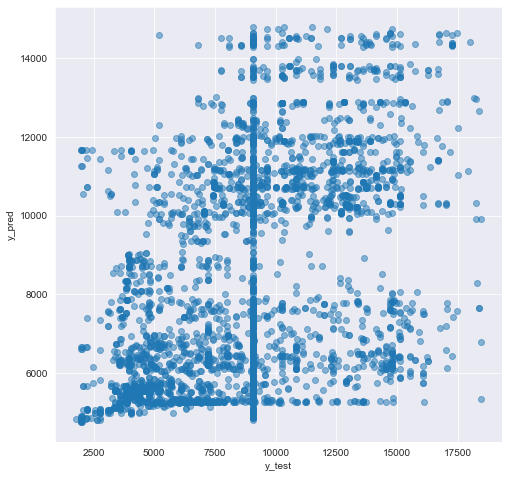

In [254]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##### Plot of RandomForestRegressor

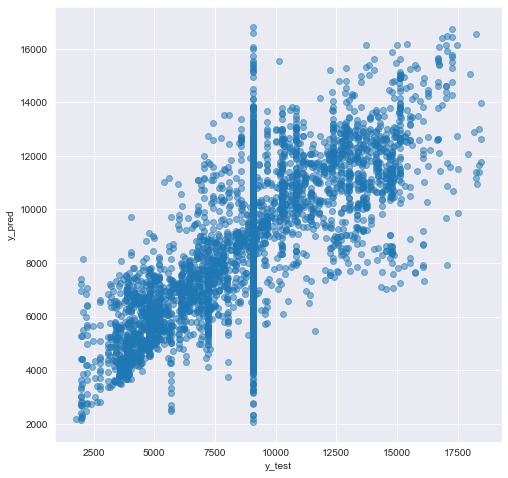

In [255]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Plotting of XGBRegressor

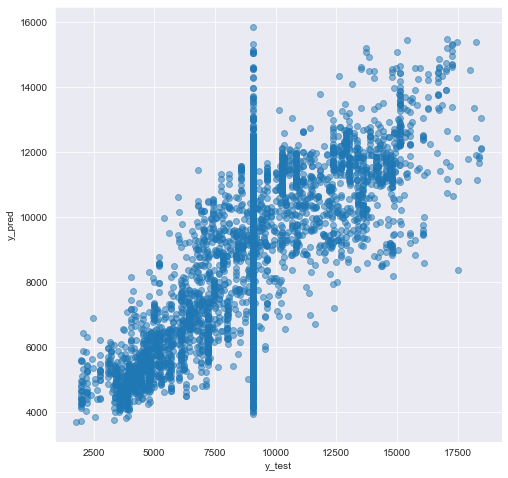

In [270]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##### XGBRegressor is predicting better than any other models. so we will consider the same to predict our target features

In [271]:
# we will create pickel file

import pickle
filename = 'Airline.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [272]:
# loading the pickel file for prediction & score

loaded_model = pickle.load(open('Airline.pkl', 'rb'))
result = loaded_model.score(robust_stan_normalize_test, y_test)
print(result*100)

62.60640588350901


In [273]:
y_test.shape

(3557,)

In [274]:
conclusion=pd.DataFrame([loaded_model.predict(robust_stan_normalize_test)[:],y_test[:]],index=["Predicted","Original"])

In [275]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556
Predicted,5281.044922,7984.146484,8374.887695,7337.291504,12343.935547,6849.097656,6172.510742,4264.572266,5054.385742,10342.852539,...,7384.979492,9225.354492,10423.567383,10293.962891,4957.92334,11850.650391,11660.078125,11229.838867,4969.794434,4124.822266
Original,6038.000000,7452.000000,7451.000000,9646.000000,9087.064121,5406.000000,5515.000000,3597.000000,3898.000000,6795.000000,...,6381.000000,9087.064121,9087.064121,9483.000000,4804.00000,14151.000000,14151.000000,10844.000000,4804.000000,9087.064121
